In [ ]:
%run init.ipynb  
        
init = InitFolders(folders = ["data", "img", "img/score", "img/imp", "img/corr", "img/hist1d", "img/hist2d", "img/scatter", "img/overview"], need_install_libs=True)

init.INIT("./")



In [ ]:
%run preprocess.ipynb
%run plot.ipynb
%run imp.ipynb
%run predict.ipynb

import os
from typing import Optional
import pandas as pd
import numpy as np

In [ ]:

%run imp.ipynb

pp = Preprocess("./ai4i2020.csv")
df = pp.preprocess(
    enc_columns = ['Type', 'Product ID'],
    kelvin_columns = ['Air temperature [K]', 'Process temperature [K]']
)


explo = ExplorationPlot(data = df)



explo._create_exploration_report(
                                plot_2d_names = [
                                                'Type', 'Air temperature [K]', 'Process temperature [K]',
                                                'Rotational speed [rpm]', 'Torque [Nm]',                                
                                                'Tool wear [min]', 'Machine failure'
                                                ],
                                save_plot_1d = True,
                                save_plot_2d = True,
                                save_plot_corr = True,
                                save_plot_overview = True
                            )



imp = Impute(
            data = df, 
            columns = ['Rotational speed [rpm]', 'Air temperature [K]'], 
            ITER_TO_PLOT = 40
        )
       
pred, data = imp.impute_cols(distribution = "normal", num_vals = 1000)


data = data[[
    'Air temperature [K]', 
    'Machine failure', 
    'Torque [Nm]', 
    'Tool wear [min]', 
    'Rotational speed [rpm]',
    'enc_Type',
    'enc_Product ID',
    'Process temperature [K]'
    ]]

data.head()



c = Classification(
                    data = data,
                    x_cols = [
                            'Air temperature K', 
                            'Machine failure', 
                            'Torque Nm', 
                            'Tool wear min', 
                            'Rotational speed rpm',
                            'enc_Type',
                            'enc_Product ID',
                            'Process temperature K'
                            ],
                    y_col = 'Machine failure'  
                )

y, dummy, x, xgb_probas = c._classify()


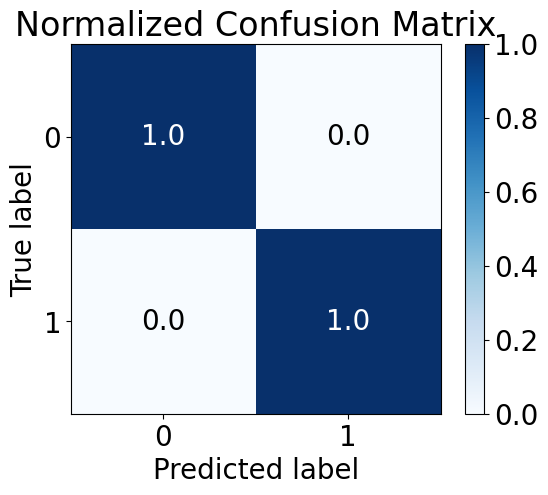

In [53]:
%run score.ipynb 

score = ScoreModel(data=data, y_true=y, y_pred=x)
score_plot = PlotClassificationMetrics(y, x)

report = score._classification_report()
score_plot._plot_conf_matrix()



In [51]:
print(report)


              precision  recall  f1-score  support
0                   1.0     1.0       1.0   3199.0
1                   1.0     1.0       1.0    101.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3300.0
weighted avg        1.0     1.0       1.0   3300.0
